In [1]:
import pickle
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

In [2]:
def plot_confusion_matrix(cf_matrix, true_labels, output_filename):
    
    plt.figsize =(10,10)
    plt.title('Confusion Matrix')
   
    
    #plot
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(true_labels))) # length of classes
    class_labels = ['0','1']
    
    #tick_marks
    plt.xticks(tick_marks,class_labels)
    plt.yticks(tick_marks,class_labels)
    plt.savefig(output_filename)
    plt.show()
    
def print_performance_metrics(true_labels, pred, model):
    print(classification_report(true_labels,pred))
    
    print( model , 'Accuracy = ', accuracy_score(true_labels,pred))
    print(model , 'Precision = ', precision_score(true_labels,pred))
    print(model , 'Recall = ', recall_score(true_labels,pred))
    print(model , 'F1 Score = ', f1_score(true_labels,pred))
    
    
    cm_matrix = confusion_matrix(true_labels, pred)
    
    # create confusion matrix plot
    
    plot_confusion_matrix(cm_matrix,true_labels, model)

    tn, fp, fn, tp = cm_matrix.ravel()
    print('False Positive Rate =', fp/(fp + tn))
    print('False Negative Rate =', fn/(fn + tp))
    

<b> Load Classification Models <b>

In [3]:
svm_model, svm_ytest, svm_pred = pickle.load(open("svm.pkl", 'rb'))
dt_model, dt_ytest, dt_pred = pickle.load(open("dt.pkl", 'rb'))
knn_model, knn_ytest, knn_pred = pickle.load(open("knn.pkl", 'rb'))

<b> Performance Analysis of the models <b>

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       492
         1.0       1.00      0.98      0.99       508

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

SVM Accuracy =  0.989
SVM Precision =  0.9960079840319361
SVM Recall =  0.9822834645669292
SVM F1 Score =  0.9890981169474728


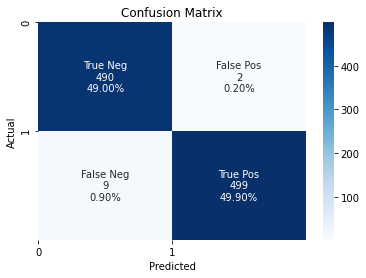

False Positive Rate = 0.0040650406504065045
False Negative Rate = 0.017716535433070866


In [4]:
print_performance_metrics(svm_ytest, svm_pred, 'SVM')

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       492
         1.0       0.99      0.98      0.98       508

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Decision Tree Accuracy =  0.983
Decision Tree Precision =  0.9900199600798403
Decision Tree Recall =  0.9763779527559056
Decision Tree F1 Score =  0.9831516352824579


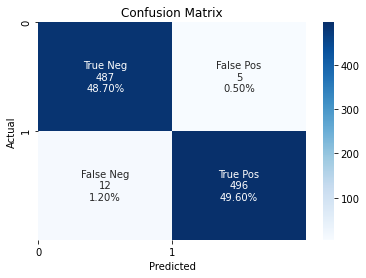

False Positive Rate = 0.01016260162601626
False Negative Rate = 0.023622047244094488


In [5]:
print_performance_metrics(dt_ytest, dt_pred, 'Decision Tree')

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       492
         1.0       0.99      0.98      0.99       508

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

KNN Accuracy =  0.989
KNN Precision =  0.9940357852882704
KNN Recall =  0.984251968503937
KNN F1 Score =  0.9891196834817013


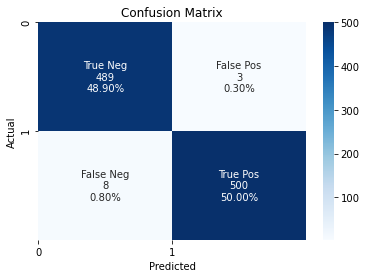

False Positive Rate = 0.006097560975609756
False Negative Rate = 0.015748031496062992


In [6]:
print_performance_metrics(knn_ytest, knn_pred, 'KNN')

<b>Mask Detection using the best model</b>

In [7]:
import mask_detection

<b>Choosing the model type as classification or deep-learning. For classification, the model is also passed as parameter</b>

In [8]:
type= 'classification'
mask_detection.main(type, svm_model)

in camera class
